# 1) Radiación del cuerpo Negro

Al calentar un sólido, este comienza a emitir radiación térmica, lo que provoca que brille. Al estudiar esta emisión de radiación térmica se ha observado una distribución continua de frecuencias que abarca desde el infrarojo hasta el ultravioleta que es dependiente de la temperatura. Esta distribución fue descrita por Max Planck, está dada por:

$$ U(\nu,T)= \frac{8\pi\nu^2}{c^3} \frac{h\nu}{e^{\frac{h\nu}{kT}-1}}$$

1. Escriba un código para hacer la gráfica de la densidad de energía por unidad de frecuencia, como función de la longitud de onda. Haga curvas para temperaturas de 10000 K, 8000 K, 5000 K y 3000 K

Expresando la distribución de Planck en términos de longitud de onda y factorizando las constantes:
$$U(\lambda,T)=\frac{a}{\pi\lambda^5 (e^{\frac{b}{\lambda T}}-1)}$$

Donde $a = 3.7418\times10^{-16} W m^{-2}$ y b = $a = 1.4388\times10^{-2} m °K$

In [1]:
!pip install metpy
import metpy
import matplotlib.pyplot as plt
import numpy as np
from metpy.units import units
from scipy.constants import h, c, k
pi = np.pi

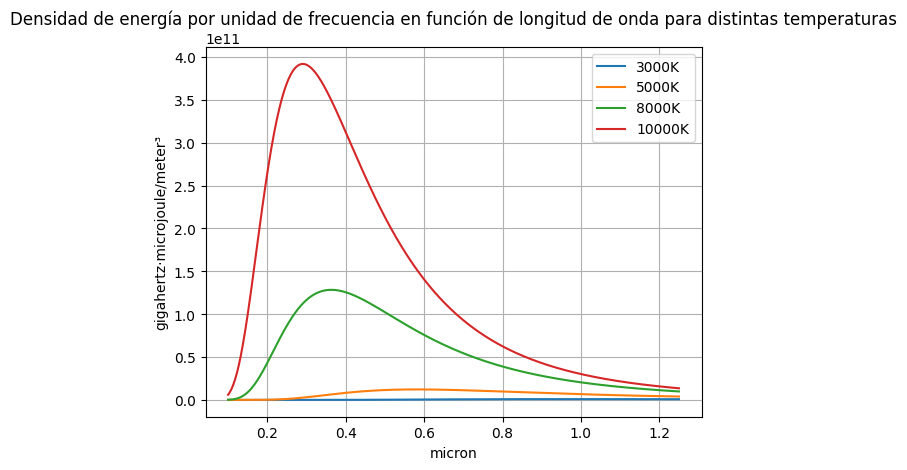

In [2]:
def planckDist(temp,Lmin = 0.1 * units.micron, Lmax =  1.25 * units.micron, nsteps = 500):
  # Dimensiones y constantes
  a = 3.74e-16 * units('W m^2')
  b = 1.45e-2 * units('m K')
  Lmax = Lmax.to(Lmin.units)

  # Array de longitudes de onda, debe estar en las unidades de Lmax y Lmin
  Lambda = np.linspace(Lmin.m,Lmax.m,nsteps) * Lmin.units

  # Densidad de energía por unidad de frecuencia como función de longitud de onda
  U = (a*Lambda**-5)/((np.pi*np.exp(b/(Lambda*temp))-1))
  U = U.to('microJ m^-3 GHz')
  return Lambda,U

# Evaluar a distintas temperaturas
l1,u1 = planckDist(3000* units.kelvin)
l2,u2 = planckDist(5000* units.kelvin)
l3,u3 = planckDist(8000* units.kelvin)
l4,u4 = planckDist(10000* units.kelvin)

plt.plot(l1,u1,label = '3000K')
plt.plot(l2,u2,label = '5000K')
plt.plot(l3,u3,label = '8000K')
plt.plot(l4,u4,label = '10000K')
plt.grid()
plt.legend()
plt.title('Densidad de energía por unidad de frecuencia en función de longitud de onda para distintas temperaturas')
plt.show()

2. Calcule la longitud de onda en el pico de cada curva del punto anterior y determine a qué parte delespectro electromagnético corresponde.


Tratando $T$ como constante tenemos que el máximo para cada curva estará dado por:
$$\frac{\partial U(\lambda,T)}{\partial \lambda} = 0$$

Entonces:

$$\frac{\partial}{\partial \lambda}(\frac{a}{\pi\lambda^5 (e^{\frac{b}{\lambda T}}-1)}) = a\frac{\partial}{\partial \lambda}\frac{1}{\pi\lambda^5 (e^{\frac{b}{\lambda T}}-1)}$$

$$a\frac{\partial}{\partial \lambda}\frac{1}{\pi\lambda^5 (e^{\frac{b}{\lambda T}}-1)} = a\frac{\partial}{\partial \lambda}((\pi\lambda^5(e^{\frac{b}{\lambda T}}-1))^{-1})$$

$$a\frac{\partial}{\partial \lambda}((\pi\lambda^5(e^{\frac{b}{\lambda T}}-1))^{-1}) = \frac{a}{(\piλ^5\left(e^{\frac{b}{λT}}-1\right))^2}\frac{\partial}{\partial \lambda}\pi\lambda^5\left(e^{\frac{b}{λT}}-1\right)$$

$$=-\frac{a}{\left(\piλ^5\left(e^{\frac{b}{λT}}-1\right)\right)^2}\left(5\pi\lambda^4\left(e^{\frac{b}{Tλ}}-1\right)-\frac{be^{\frac{b}{Tλ}}λ^3}{T}\right) = 0$$

Sin embargo, en lugar de sustituir los valores constantes de a, b y T, se puede emplear derivación numérica para llegar al resultado:

In [3]:
# Conversión a array numérico
l1,l2,l3,l4,u1,u2,u3,u4 = l1.m,l2.m,l3.m,l4.m,u1.m,u2.m,u3.m,u4.m

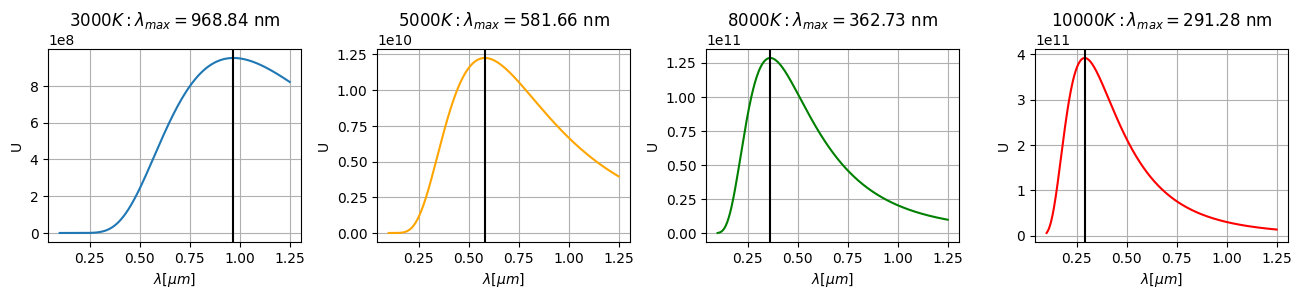

In [4]:
# Derivación numérica y maximización
def local_maxima(xval, yval):
    xval = np.asarray(xval)
    yval = np.asarray(yval)

    sort_idx = np.argsort(xval)
    yval = yval[sort_idx]
    gradient = np.diff(yval)
    maxima = np.diff((gradient > 0).view(np.int8))
    return np.concatenate((([0],) if gradient[0] < 0 else ()) +
                          (np.where(maxima == -1)[0] + 1,) +
                          (([len(yval)-1],) if gradient[-1] > 0 else ()))

max3000 = l1[local_maxima(l1,u1)[0]]
max5000 = l2[local_maxima(l2,u2)[0]]
max8000 = l3[local_maxima(l3,u3)[0]]
max10000 = l4[local_maxima(l4,u4)[0]]

# Para observar mejor los picos, graficamos individualmente en subplots
fig,axs = plt.subplots(1,4, figsize = (16,2.5))
plt.subplots_adjust(wspace=0.3)
for ax in axs.flat:
    ax.set(xlabel= r'$\lambda [\mu m]$', ylabel='U')

axs[0].plot(l1,u1,label = '3000K')
axs[0].grid()
axs[0].set_title(r"$3000K:\lambda_{max}=$"+f'{round(max3000*1000,2)} nm')
axs[0].axvline(max3000,c='k')

axs[1].plot(l2,u2,label = '5000K',c='orange')
axs[1].grid()
axs[1].set_title(r"$5000K:\lambda_{max}=$"+f'{round(max5000*1000,2)} nm')
axs[1].axvline(max5000,c='k')

axs[2].plot(l3,u3,label = '8000K',c='g')
axs[2].grid()
axs[2].set_title(r"$8000K:\lambda_{max}=$"+f'{round(max8000*1000,2)} nm')
axs[2].axvline(max8000,c='k')

axs[3].plot(l4,u4,label = '10000K',c='r')
axs[3].grid()
axs[3].set_title(r"$10000K:\lambda_{max}=$"+f'{round(max10000*1000,2)} nm')
axs[3].axvline(max10000,c='k')

fig.show()

En $T = 3000K$ la radiación emitida es del infrarojo cercano, en $T = 5000K$ la radiación emitida se encuentra en el espectro visible, y tanto en $T = 8000K$ como en $T = 10000K$ la radiación se encuentra en el ultravioleta cercano.

3. Grafique una de las curvas del punto 1 como función de la frecuencia. En la misma gráfica, incluya la curva de Rayleigh-Jeans, para bajas frecuencias. Haga una comparación cuantitativa del nivel de concordancia entre las dos curvas. Repita el mismo ejercicio, pero ahora para la predicción de Wien. Tiene libertad para medir la concordancia entre las curvas.

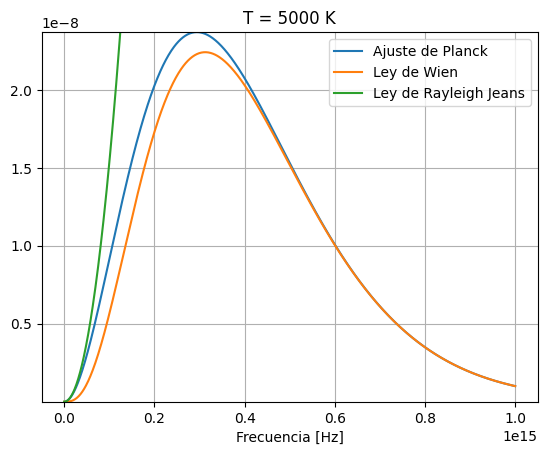

In [5]:
# T = 5000K
# Distribución de Planck en términos de la frecuencia
fPlanck = lambda nu: 2*h*nu**3/c**2 * 1/(np.exp(h*nu/(k*5000))-1)

# Ley de Wien
fWien = lambda nu: 2*h*nu**3/c**2 * np.exp(-h*nu/(k*5000))

# Ley de Rayleigh Jeans
fRayleighJeans = lambda nu: 2*nu**2*k*5000/c**2

# Array de frecuencias
nu = np.linspace(1e10, 1e15, 1000)

plt.plot(nu, fPlanck(nu), label = 'Ajuste de Planck')
plt.plot(nu, fWien(nu), label = 'Ley de Wien')
plt.plot(nu, fRayleighJeans(nu), label = 'Ley de Rayleigh Jeans')
plt.ylim(min(fPlanck (nu)),max(fPlanck (nu)))
plt.legend()
plt.xlabel("Frecuencia [Hz]")
plt.title(f"T = {5000} K")
plt.grid()
plt.show()

Comparando el área bajo cada curva podemos obtener una noción del error. Dado que se trata de curvas de densidad de energía, la diferencia del área bajo curvas representará diferencias de energía. Si la diferencia entre áreas es cercana a 0, las curvas siendo comparadas tienen una concordancia aceptable y se puede interpretar que los modelos comparados predicen la misma energía por unidad de frecuencia.

In [6]:
# Integrador numérico
from scipy.integrate import quad

LowPlanck = quad(fPlanck,1e10,4e14)[0]
HighPlanck = quad(fPlanck,4e14,1e15)[0]

# Comparación de Rayleigh-Jeans a bajas frecuencias
LowRJ = quad(fRayleighJeans,1e10,4e14)[0]
diferencia = np.abs(LowPlanck-LowRJ)
porcentualAdimensional = diferencia/LowPlanck
print(f"El porcentaje de diferencia de área entre las curvas del ajuste de Planck y la ley de Rayleigh-Jeans para bajas frecuencias es de {round(porcentualAdimensional,3)}%")

# Comparación de Rayleigh-Jeans a altas frecuencias
HighRJ = quad(fRayleighJeans,4e14,1e15)[0]
diferencia = np.abs(HighPlanck-HighRJ)
porcentualAdimensional = diferencia/HighPlanck
print(f"El porcentaje de diferencia de área entre las curvas del ajuste de Planck y la ley de Rayleigh-Jeans para altas frecuencias es de {round(porcentualAdimensional,3)}%")

El porcentaje de diferencia de área entre las curvas del ajuste de Planck y la ley de Rayleigh-Jeans para bajas frecuencias es de 4.125%
El porcentaje de diferencia de área entre las curvas del ajuste de Planck y la ley de Rayleigh-Jeans para altas frecuencias es de 100.077%


La ley de Rayleigh Jeans predice correctamente la densidad de energía para frecuencias bajas, pero produce densidades extremadamente altas para frecuencias altas.

In [7]:
# Comparación de Wien a bajas frecuencias
LowRJ = quad(fWien,1e10,4e14)[0]
diferencia = np.abs(LowPlanck-LowRJ)
porcentualAdimensional = 100*(diferencia/LowPlanck)
print(f"El porcentaje de diferencia de área entre las curvas del ajuste de Planck y la ley de Wien para bajas frecuencias es de {round(porcentualAdimensional,3)}%")

# Comparación de Wien a altas frecuencias
HighRJ = quad(fWien,4e14,1e15)[0]
diferencia = np.abs(HighPlanck-HighRJ)
porcentualAdimensional = 100*(diferencia/HighPlanck)
print(f"El porcentaje de diferencia de área entre las curvas del ajuste de Planck y la ley de Wien para altas frecuencias es de {round(porcentualAdimensional,3)}%")

El porcentaje de diferencia de área entre las curvas del ajuste de Planck y la ley de Wien para bajas frecuencias es de 12.876%
El porcentaje de diferencia de área entre las curvas del ajuste de Planck y la ley de Wien para altas frecuencias es de 0.731%


Por otro lado La Ley de Wien predice bien la densidad de energía en altas frecuencias pero su error para bajas frecuencias incrementa en 3 órdenes de magnitud.

### Lucas Nieto Martínez
### Alejandro Ruiz Salazar